2) 그리드 서치 

    - 매개변수를 튜닝하여 일반화 성능을 개선하는 방법
    - 관심있는 매개변수들을 대상으로 가능한 모든 조합을 시도 해보는 것
    - SVC 파이썬 클래스에 구현된 RBF 커널 SVM 이용 ( 감마, C값이 중요한 매개변수 

In [4]:
#두 매개변수 조합에 대해 분류기를 학습시키고 평가하는 간단한 그리드 서치를 for문을 통해 생성
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
best_score = 0

print('훈련 셋 크기 : {}  테스트 셋 크기 : {}'.format(X_train.shape[0], X_test.shape[0]))

for gamma in [0.001 ,0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        
        if score > best_score :
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
            
print('최고점수 : ', best_score)
print('최적 매개변수 : ' , best_parameters)




훈련 셋 크기 : 112  테스트 셋 크기 : 38
최고점수 :  0.9736842105263158
최적 매개변수 :  {'C': 100, 'gamma': 0.001}


- 위으 정확도 97%는 새로운 데이터 까지 이어지지 않을 수 있다.
- 평가를 위해서는 모델 생성시 이용하지 않은 독립된 데이터셋이 필요하다.
- 데이터를 다시 나눠서 세개의 셋으로 만들어 이문제를 해결가능하다. 
  
  ( 훈련데이터 -> 모델 생성, 검증(개발) 데이터 -> 매개변수 선택, 테스트 데이터 -> 성능 평가)

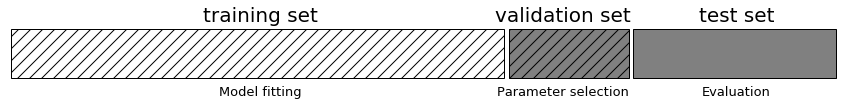

In [6]:
import mglearn
mglearn.plots.plot_threefold_split()

In [8]:
#위 그림을 구현한 코드
from sklearn.svm import SVC

#(훈련+검증), 테스트
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)

#훈련 검증 세트의 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print('각 세트의 크기 : {} {} {}'.format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001 ,0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        
        if score > best_score :
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
#훈련, 검증 셋을 합쳐 모델을 다시 만든후 테스트 세트 이용하여 평가
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print('검증에서 최고 점수 : ', best_score)
print('최적 매개변수 : ', best_parameters)
print('최적 매개변수 이용한 테스트 점수 :', test_score)

각 세트의 크기 : 84 28 38
검증에서 최고 점수 :  0.9642857142857143
최적 매개변수 :  {'C': 10, 'gamma': 0.001}
최적 매개변수 이용한 테스트 점수 : 0.9210526315789473


- 검증과 테스트 점수사이의 차이가 있다. 이는 새로운 데이터에 대해 92%정확하다 볼 수 있다. 
- 훈련, 검증, 테스트 셋 구분은 실제 머신러닝 알고리즘 적용에 매우 중요하다. 
- 위와 같이 낙관적 추정된 정확도를 피하기 위해 최종 평가에만 이용되도록 테스트 세트를 분리해 유지하는 것이 중요하다. 
- 일반화 성능을 더 잘 평가하려면 훈련 세트, 검증 세트를 한 번 나누는 것이 아닌 교차검증 이용을 통해 조합 성능 평가가 가능하다. 

In [12]:
from sklearn.model_selection import cross_val_score


for gamma in [0.001 ,0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma = gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        score = np.mean(scores)
        
        
        if score > best_score :
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

print('검증에서 최고 점수 : ', best_score)
print('최적 매개변수 : ', best_parameters)
print('최적 매개변수 이용한 테스트 점수 :', svm.score(X_test, y_test))

검증에서 최고 점수 :  0.9726896292113683
최적 매개변수 :  {'C': 100, 'gamma': 0.01}
최적 매개변수 이용한 테스트 점수 : 0.9736842105263158


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


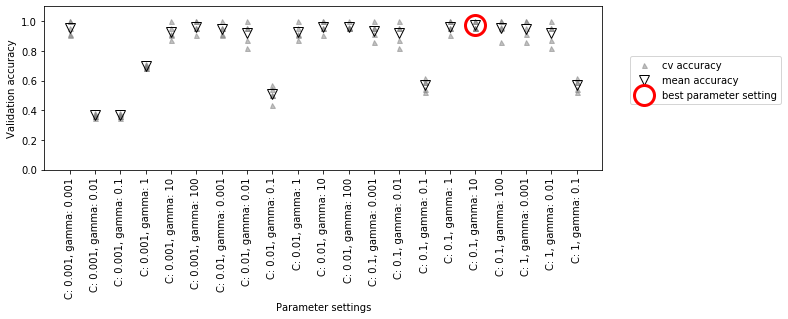

In [13]:
mglearn.plots.plot_cross_val_selection()

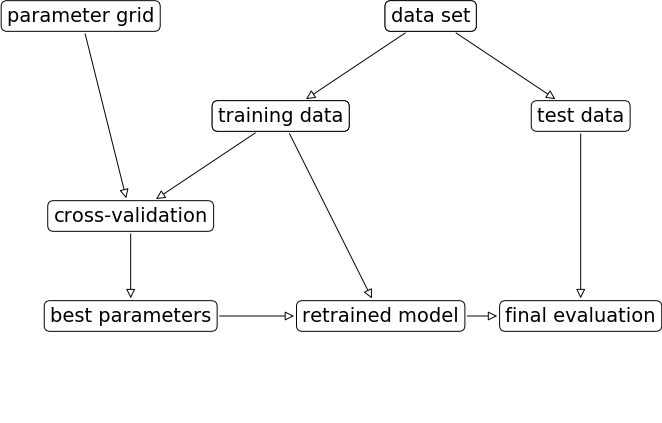

In [14]:
mglearn.plots.plot_grid_search_overview()

- 교차 검증을 사용한 그리드 서치를 매개변수 조정 방법으로 널리 이용한다. 
- 사이킷 런의 GridSearchCV는 딕셔너리 형태로 대상 매개변수를 지정해야 하고, 필요한 모든 모델 학습한다.

In [16]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print('매개변수 그리드 :', param_grid)

매개변수 그리드 : {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score = True)

- GridSearchCV이용시 교차검증을 이용하지만, 매개변수가 과적합 되는 것을 피하려면 훈련, 테스트 셋으로 나눠야 한다. 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

- 그리드 서치 객체는 분류기와 비슷해 fit, predict, score 메서드를 제공하지만, fit메서드를 호출하면 매개변수 조합에 대한 교차 검증 수행

In [19]:
grid_search.fit(X_train, y_train)

c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

- 그리드 서치 객체의 fit 메서드는 최적 매개변수 탐색, 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터 셋에 대해 모델 자동으로 만든다. 
- 또한 전체 데이터로 학습한 모델에 접근 가능하도록 predict, score 메서드 제공

  (최적 매개변수로 일반화 성능 평가하려면 테스트 세트를 매개변수로 넘겨 score 메서드 호출)

In [20]:
print('테스트 셋 점수 :', grid_search.score(X_test, y_test))

테스트 셋 점수 : 0.9736842105263158


In [21]:
#선택 매개변수, 최상 교차검증 정확도 확인
print(' 최적 매개변수 :', grid_search.best_params_)
print(' 최고 교차 검증 점수 :', grid_search.best_score_)

 최적 매개변수 : {'C': 100, 'gamma': 0.01}
 최고 교차 검증 점수 : 0.9732142857142857


In [22]:
#만들어진 실제 모델에 접근하여 계수나 특성 중요도 확인
print('최고 성능 모델 :\n', grid_search.best_estimator_)

최고 성능 모델 :
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


교차 검증 결과 분석
- 교차 검증 결과 시각화를 통해 대상 매개변수가 모델 일반화에 영향을 얼마나 주는지 이해에 도움
- 그리드 서치는 연산 비용이 매우커 간격을 넓게 하여 적은 수의 그리드로 시작하는 것이 좋다. 
- 그리드 서치 결과는 cv_results_속성에 많은 정보들과 함께 담겨 있다.

In [25]:
import pandas as pd
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)

display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.0010005,0.000998783,0.000593567,0.000400925,0.000591803
std_fit_time,8.90371e-06,5.08542e-06,0.00048473,0.000491037,0.000483357
mean_score_time,0,0,0.000199461,0,0
std_score_time,0,0,0.000398922,0,0
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.375,0.375,0.375,0.375,0.375
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


- result의 행 하나는 특정한 하나의 매개변수 설정에 대응
- 각 설정 교차검증의 모든 분할 평균, 표준편차를 포함한 결과 기록
- 위와 같은 경우는 그리드가 2차원이므로 히트맵으로 시각화 하기 좋다. 

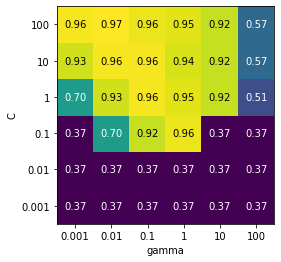

In [27]:
#교차 검증의 평균을 뽑아, C와 감마 축에 맞도록 배열 차원 변환
scores = np.array(results.mean_test_score).reshape(6,6)

#교차검증 평균 점수 히트맵 그래프 
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'],
                     ylabel = 'C', yticklabels=param_grid['C'], cmap = 'viridis')

- 위의 히트맵의 각 포인트는 특정 매개변수 설정에 대한 교차 검증 실행을 나타낸다. 
- 정확도가 높으면 밝은 색, 낮으면 어두운 색
- SVC가 매개변수 설정에 매우 민감함을 알 수 있다. 

c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


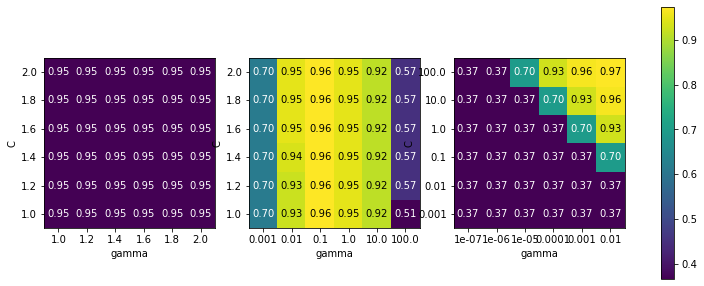

In [31]:
#검색 범위가 적절하지 않아 바람직하지 못한 결과의 예를 나타낸 그래프 
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize = (13, 5))

# 점수 변화가 없음, 매개변수 스케일 범위가 부적절한 경우
param_grid_linear = {'C':np.linspace(1,2,6),
                    'gamma':np.linspace(1,2,6)}

#세로 띠 형태, gamma매개변수는 적절함 범위지만, C는 중요한 매개변수가 아니거나, 적절한 범위가 아닌 경우 
param_grid_one_log = {'C':np.linspace(1,2,6),
                     'gamma':np.logspace(-3,2,6)}

#값의 변화는 있지만, 좌하단 영역의 변화가 없으므로 경계 너머에 더 나은 값이 있다 판단 가능하여 매개변수 검색 범위 늘려야 하는 경우 
param_grid_range = {'C':np.logspace(-3,2,6),
                   'gamma':np.logspace(-7,-2,6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range],axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    scores_image= mglearn.tools.heatmap(
                     scores, xlabel = 'gamma', xticklabels = param_grid['gamma'],
                     ylabel = 'C', yticklabels=param_grid['C'], cmap = 'viridis', ax = ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

비대칭 매개변수 그리드 탐색

- SVC같은 경우 kernel 매개변수를 가지고 있는데 어떤 커널 이용에 따라 관련 매개변수들이 결정된다. 
- linear 경우 C만 사용, rbf경우 C와 gamma 모두 이용
- 이와 같은 경우 C, gamma, kernel 매개변수의 모든 조합을 조사하는것은 맞지 않다. 
- 조건부 매개변수 조합 이용시에는 param_grid를 딕셔너리 리스트로 만들어주면 된다. 

In [32]:
param_grid = [{'kernel':['rbf'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}, 
             {'kernel':['linear'],
             'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

print('그리드 목록 :\n', param_grid)

그리드 목록 :
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [33]:
grid_search = GridSearchCV(SVC(), param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train, y_train)
print('최적 파라미터 ', grid_search.best_params_)
print('최고 교차 검증 점수 : ', grid_search.best_score_)

최적 파라미터  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
최고 교차 검증 점수 :  0.9732142857142857


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00039916,0.000598431,0.000398922,0.00039897,0.000598383,0.000598383,0.000199461,0.000798035,0.000398874,0.000598431,0.000199413,0.000797987,0.000398922,0.000398922,0.000598383,0,0.000598431,0.000797844,0.000797939,0,0.000199461,0.000797844,0.000797796,0.000598431,0,0.000199509,0.000199413,0.000199413,0.000598431,0.00039897,0.000797844,0.000199461,0,0.000598335,0.000997353,0.000598335,0.000797892,0,0.000199509,0.000199461,0.000199461,0.000398874
std_fit_time,0.00048887,0.000488617,0.000488578,0.000488636,0.000488578,0.000488578,0.000398922,0.000399017,0.000488519,0.000488617,0.000398827,0.000398994,0.000488578,0.000488578,0.000488578,0,0.000488617,0.000398922,0.00039897,0,0.000398922,0.000398922,0.000398898,0.000488617,0,0.000399017,0.000398827,0.000398827,0.000488617,0.000488636,0.000398922,0.000398922,0,0.000488539,9.53674e-08,0.000488539,0.000398946,0,0.000399017,0.000398922,0.000398922,0.000488519
mean_score_time,0.000199318,0.000199509,0.000199461,0.000199461,0.000199461,0.000398874,0.000997448,0.000199413,0.000199461,0.000398684,0.00039897,0.000199413,0.000398922,0.000398922,0,0.000398922,0,0.000199461,0.000199413,0,0,0.000199461,0,0.000399017,0.000398922,0,0.00039897,0,0.000199461,0.000598431,0.000199509,0,0.000199461,0.000199461,0,0.000199509,0.000199413,0.00039897,0,0.000199461,0.000199509,0
std_score_time,0.000398636,0.000399017,0.000398922,0.000398922,0.000398922,0.000488519,1.16801e-07,0.000398827,0.000398922,0.000488286,0.000488636,0.000398827,0.000488578,0.000488578,0,0.000488578,0,0.000398922,0.000398827,0,0,0.000398922,0,0.000488694,0.000488578,0,0.000488636,0,0.000398922,0.000488617,0.000399017,0,0.000398922,0.000398922,0,0.000399017,0.000398827,0.000488636,0,0.000398922,0.000399017,0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel':

그리드 서치에 다양한 교차 검증 적용

- 그리드 서치는 기본값으로 cross_val_score와 비슷하게 분류에는 계층형 k-겹 교차검증 이용, 회귀는 k-겹 교차검증 이용
- 다른 교차 검증 분할기 이용 가능 ( ex) n_splits = 1로 하고 ShuffleSplit, StratifiedShuffleSplit 이용 가능  - 데이터셋 커 모델 구축 시간이 오래 걸리는 경우)

    1) 중첩 교차 검증 
    
    - 바깥쪽 루프에서 훈련, 테스트 데이터 스플릿, 각 훈련 세트에 대해 그리드 서치 실행
    - 분할된 테스트 세트의 점수를 최적의 매개변수 설정을 사용해 각각 측정
    - 모델, 매개변수 설정이 아닌 테스트 점수의 목록 생성
    - 미래 데이터 적용위한 것이 나닌, 특정 데이터셋에서 주어진 모델이 얼마나 잘 일반화 되는지 평가하는 방법

In [36]:
param_grid={'C':[0.001,0.01, 0.1, 1, 10, 100], 
           'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

#안쪽, 바깥쪽 루프에 각 계층형 5겹 교차 검증 이용 grid 매개변수 조합은 36개 모델은 총 900개
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)

print('교차 검증 점수 : ', scores)
print('교차 검증 평균 점수 :', scores.mean())
print(param_grid)

교차 검증 점수 :  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수 : 0.9800000000000001
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [37]:
#안쪽과 바깥쪽 루프에 각기 다른 교차 검증 전략 조합
def nested_cv(X, y, inner_cv, outer_cv ,Classifier, parameter_grid):
    outer_scores = []
    #outer_cv분할 순회하는 for 루프
    for training_samples, test_samples in outer_cv.split(X,y):
        #최적 매개변수 탐색
        best_parms = {}
        best_score = -np.inf
        #매개변수 그리드 순회
        for parameters in parameter_grid:
            #안쪽 교차검증 점수 기록
            cv_scores=[]
            #inner_cv 분할 순회 for 루프
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                #훈련 데이터와 주어진 매개변수로 분류기 생성
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                #검증세트로 평가
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            #안쪽 교차 검증 평균점수 계산
            mean_score=np.mean(cv_scores)
            if mean_score > best_score:
                #w점수가 더 높으면 매개변수와 함께 기록
                best_score = mean_score
                best_params = parameters
        #바깥쪽 훈련 데이터 전체를 사용해 분류기 생성
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        #테스트 셋 이용 평가
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [39]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print('교차검증 점수 :', scores)

교차검증 점수 : [0.96666667 1.         0.96666667 0.96666667 1.        ]


교차 검증과 그리드 서치 병렬화

- 그리드 서치는 데이터가 크고 매개변수가 많으면 연산 부하를 일으키지만, 병렬화 가능
- 하나의 교차 검증 분할에서 특정 매개변수 설정을 사용해 모델 생성하는 일은, 다른 설정 모델과 상관없이 진행 가능
- GridSearchCV, crossS_val_score에서 n_jobs 매개변수에 사용할 cpu코어 수 지정 가능 ( -1이면 모든 코어 이용 )
- 분산 컴퓨팅 패키지인 Dask를 이용하여 여러 머신에서 병렬화 가능

  (https://ml.dask.org/joblib.html)